<a href="https://colab.research.google.com/github/springboardmentor88888-mahaprasad/Intern-PlantChatBot-Project/blob/Reshma837/AI_PlantDocBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🌱PlantDocBot : AI Plant Disease Diagnosis via Chat and Image Upload**

### **Project** : AI PlantDoc Bot (Infosys Springboard Virtual Internship)       **Domain**: Artificial Intelligence      **Author** : MANDAPAKA RESHMA  **Date**: 03 December 2025

# **🎯OBJECTIVE**:
###To develop an AI-powered chatbot that allows users (especially farmers and gardeners) to upload images of plant leaves or describe symptoms via text, and receive accurate plant disease diagnosis and treatment recommendations using image processing and natural language processing techniques.

# **📅 DAY 1**:

1.**ENVIRONMENT SETUP**: Configure workspace and dependencies

2.**DATA ACQUISITION**: Download PlantVillage and PlantDoc datasets

3.**DATA VERIFICATION**: Validate directory structure and file integrity

4.**EXPLORATORY DATA ANALYSIS (EDA)**: Visualize samples and analyze class distribution 📊

In [16]:
# 🛠️ 1. Environment Setup & Imports
# Importing necessary libraries for file handling, visualization, and system operations.

import os
import glob
import shutil
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from dataclasses import dataclass

# Using a Configuration class to manage paths and constants.
@dataclass
class Config:
    PROJECT_NAME: str = "PlantDocBot"
    BASE_DIR: pathlib.Path = pathlib.Path(f"/content/{PROJECT_NAME}")
    DATA_DIR: pathlib.Path = BASE_DIR / "data"
    PLANT_VILLAGE_DIR: pathlib.Path = DATA_DIR / "plantvillage"
    PLANT_DOC_DIR: pathlib.Path = DATA_DIR / "plantdoc"
    TEXT_CORPUS_DIR: pathlib.Path = DATA_DIR / "text_corpus"

config = Config()

# Ensure base directories exist
for directory in [config.PLANT_VILLAGE_DIR, config.PLANT_DOC_DIR, config.TEXT_CORPUS_DIR]:
    directory.mkdir(parents=True, exist_ok=True)

print(f"✅ Project Structure Created at: {config.BASE_DIR}")

✅ Project Structure Created at: /content/PlantDocBot


In [17]:
# 📥 2. Data Acquisition
# Cloning the required datasets from GitHub.
# We check if the data already exists to prevent redundant downloads on re-runs.

def clone_repo(repo_url, target_dir):
    """
    Clones a git repository to a target directory if it doesn't already exist.
    """
    if not os.listdir(target_dir):  # Check if directory is empty
        print(f"⬇️ Cloning {repo_url}...")
        !git clone {repo_url} {target_dir}
        print(f"✅ Successfully cloned to {target_dir}")
    else:
        print(f"ℹ️ Data already exists in {target_dir}. Skipping download.")

# PlantVillage Dataset (High-quality classification data)
clone_repo("https://github.com/spMohanty/plantvillage-Dataset.git", config.PLANT_VILLAGE_DIR)

# PlantDoc Dataset (Real-world noisy data)
clone_repo("https://github.com/pratikkayal/PlantDoc-Dataset.git", config.PLANT_DOC_DIR)

ℹ️ Data already exists in /content/PlantDocBot/data/plantvillage. Skipping download.
ℹ️ Data already exists in /content/PlantDocBot/data/plantdoc. Skipping download.


In [18]:
# 🔍 3. Data Verification
# Verifying the contents of the downloaded datasets.

def list_contents(directory, name, limit=5):
    """Lists the first few items in a directory to verify content."""
    try:
        contents = sorted([p.name for p in directory.iterdir()])
        print(f"\n📂 Contents of {name} ({len(contents)} items):")
        print(f"   {contents[:limit]} ...")
    except Exception as e:
        print(f"❌ Error reading {name}: {e}")

list_contents(config.PLANT_VILLAGE_DIR, "PlantVillage")
list_contents(config.PLANT_DOC_DIR, "PlantDoc")


📂 Contents of PlantVillage (29 items):
   ['.git', '.gitignore', 'README.md', '_generate_data.sh', 'create_data_distribution.py'] ...

📂 Contents of PlantDoc (6 items):
   ['.git', 'LICENSE.txt', 'PlantDoc_Examples.png', 'README.md', 'test'] ...


In [19]:
# 📊 4. Exploratory Data Analysis (EDA)
# Searching for image directories and calculating statistics.

def analyze_dataset(base_path, dataset_name):
    """
    Walks through the directory to find image classes and counts.
    """
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}
    class_counts = {}

    print(f"\n🔎 Analyzing {dataset_name}...")

    for root, dirs, files in os.walk(base_path):
        # Count images in current directory
        images = [f for f in files if pathlib.Path(f).suffix.lower() in image_extensions]
        if images:
            class_name = pathlib.Path(root).name
            class_counts[class_name] = len(images)

    if not class_counts:
        print(f"⚠️ No image directories found in {dataset_name}. Check the folder structure.")
        return None

    # Sort by count
    sorted_counts = sorted(class_counts.items(), key=lambda item: item[1], reverse=True)

    print(f"✅ Found {len(class_counts)} classes.")
    print(f"   Total Images: {sum(class_counts.values())}")
    print(f"   Top 5 Classes by size:")
    for cls, count in sorted_counts[:5]:
        print(f"     - {cls}: {count} images")

    return sorted_counts

# Analyze PlantVillage (Note: The repo structure might be nested, e.g., raw/color)
# We search recursively to handle this.
pv_stats = analyze_dataset(config.PLANT_VILLAGE_DIR, "PlantVillage")


🔎 Analyzing PlantVillage...
✅ Found 76 classes.
   Total Images: 64486
   Top 5 Classes by size:
     - Orange___Haunglongbing_(Citrus_greening): 5507 images
     - Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
     - Soybean___healthy: 5090 images
     - Peach___Bacterial_spot: 2297 images
     - Tomato___Bacterial_spot: 2127 images


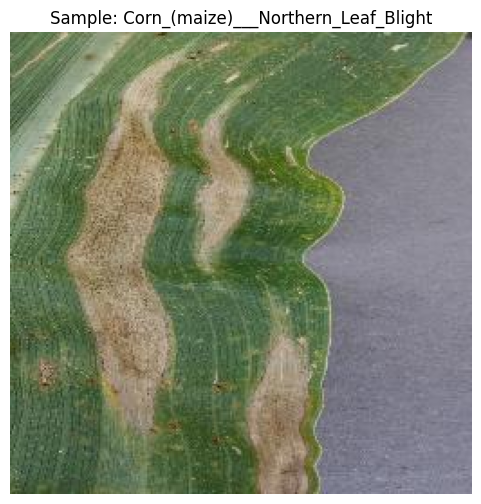

📷 Displaying sample from: /content/PlantDocBot/data/plantvillage/raw/color/Corn_(maize)___Northern_Leaf_Blight/67760849-7e8d-4a93-b72f-e951d597476f___RS_NLB 4059 copy.jpg


In [20]:
# 🖼️ 5. Visualization
# Displaying a sample image to ensure data integrity.

def show_sample_image(base_path):
    image_extensions = ['*.jpg', '*.jpeg', '*.png']
    all_images = []

    for ext in image_extensions:
        all_images.extend(glob.glob(str(base_path / "**" / ext), recursive=True))

    if all_images:
        sample_img_path = all_images[0]
        img = mpimg.imread(sample_img_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"Sample: {pathlib.Path(sample_img_path).parent.name}")
        plt.axis('off')
        plt.show()
        print(f"📷 Displaying sample from: {sample_img_path}")
    else:
        print("❌ No images found to display.")

show_sample_image(config.PLANT_VILLAGE_DIR)

# **📅 DAY 2** - Data Preprocessing & Mapping

**IMAGE VISUALIZATION**: Ensure all images are correctly loaded in RGB format and display sample images

**DATASET MAPPING**: Create a structured CSV linking each image path to its label for model training

📷 Displaying random image: /content/PlantDocBot/data/plantvillage/raw/color/Tomato___Leaf_Mold/e379328a-4265-470a-978d-5020f59f4c1f___Crnl_L.Mold 6833.JPG
   Original Mode: RGB


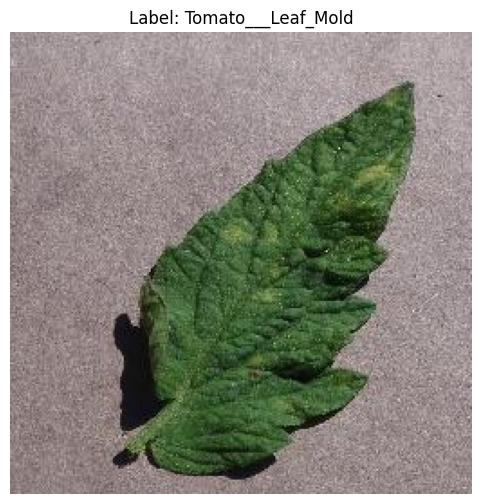

In [23]:
# 🎨 6. Robust Color Display
# Displaying a random image and ensuring it is in RGB format.
# This fixes potential issues with RGBA or Grayscale images in the dataset.

import random
import numpy as np
from PIL import Image

def display_random_image(base_path):
    """
    Selects a random image from the dataset, converts it to RGB, and displays it.
    """
    img_exts = ('.jpg', '.jpeg', '.png', '.bmp')
    all_files = []

    # Collect all image files
    for root, dirs, files in os.walk(base_path):
        for f in files:
            if f.lower().endswith(img_exts):
                all_files.append(os.path.join(root, f))

    if not all_files:
        print("❌ No images found.")
        return

    # Pick a random file
    sample_file = random.choice(all_files)
    print(f"📷 Displaying random image: {sample_file}")

    try:
        img = Image.open(sample_file)
        print(f"   Original Mode: {img.mode}")

        # Convert to RGB if necessary
        if img.mode != 'RGB':
            img = img.convert('RGB')
            print("   ✅ Converted to RGB")

        # Display using Matplotlib
        plt.figure(figsize=(6, 6))
        plt.imshow(np.asarray(img))
        plt.axis('off')
        plt.title(f"Label: {pathlib.Path(sample_file).parent.name}")
        plt.show()

    except Exception as e:
        print(f"❌ Error opening image: {e}")

# Run the function on PlantVillage data
display_random_image(config.PLANT_VILLAGE_DIR)

In [10]:
# 📝 7. Build CSV Mapping
# Creating a CSV file that maps every image path to its corresponding label.
# This DataFrame will be the foundation for our PyTorch/TensorFlow data loaders.

import pandas as pd

def create_image_dataframe(base_path, output_csv_name="image_data.csv"):
    """
    Walks through the directory, infers labels from folder names, and saves to CSV.
    """
    img_exts = ('.jpg', '.jpeg', '.png', '.bmp')
    records = []

    print(f"\n📊 Building Dataset Mapping for {base_path}...")

    for root, dirs, files in os.walk(base_path):
        for f in files:
            if f.lower().endswith(img_exts):
                path = os.path.join(root, f)

                # Infer label: The directory name relative to the base path
                # Example: data/plantvillage/Tomato_Healthy/001.jpg -> Label: Tomato_Healthy
                rel_path = os.path.relpath(path, base_path)
                label = rel_path.split(os.sep)[0]

                # Handle nested structures (like 'raw/color/Tomato_Healthy') if necessary
                # For now, we assume the immediate parent or the first folder after base is the label
                # A more robust way is to use the immediate parent folder name:
                label = pathlib.Path(path).parent.name

                records.append({"image_path": path, "label": label})

    # Create DataFrame
    df = pd.DataFrame(records)

    if df.empty:
        print("⚠️ No images found to map.")
        return None

    # Save to CSV
    output_csv_path = config.DATA_DIR / output_csv_name
    df.to_csv(output_csv_path, index=False)

    print(f"✅ Total images mapped: {len(df)}")
    print(f"✅ Saved mapping to: {output_csv_path}")
    print("\nSample Rows:")
    print(df.head())

    return df

# Create the mapping
df = create_image_dataframe(config.PLANT_VILLAGE_DIR, "plantvillage_mapping.csv")



📊 Building Dataset Mapping for /content/PlantDocBot/data/plantvillage...
✅ Total images mapped: 86231
✅ Saved mapping to: /content/PlantDocBot/data/plantvillage_mapping.csv

Sample Rows:
                                          image_path label
0  /content/PlantDocBot/data/plantvillage/data_di...    26
1  /content/PlantDocBot/data/plantvillage/data_di...    26
2  /content/PlantDocBot/data/plantvillage/data_di...    26
3  /content/PlantDocBot/data/plantvillage/data_di...    26
4  /content/PlantDocBot/data/plantvillage/data_di...    26


# **📅DAY 3**-DATASET EXPANSION & MODEL SETUP

**KAGGLE DATASET**: Download larger, diverse dataset (emmarex/plantdisease)

**DATA SPLITTING**: Split data into training and validation sets (80/20)

**MODEL SETUP**: Initialize and customize ResNet50 (pre-trained) for disease classification

In [11]:
# 📥 8. Kaggle Dataset Setup
# We are switching to a larger dataset from Kaggle for better model performance.
# NOTE: You must upload your 'kaggle.json' API key when prompted.

import os

def setup_kaggle_and_download():
    print("🔧 Setting up Kaggle...")
    # Install Kaggle client
    !pip install -q kaggle

    # Handle API Key upload
    if not os.path.exists('/root/.kaggle/kaggle.json'):
        print("⚠️ kaggle.json not found. Please upload it now.")
        from google.colab import files
        uploaded = files.upload()

        # Move to correct location
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        print("✅ Kaggle API key configured.")
    else:
        print("✅ Kaggle API key already exists.")

    # Download Dataset
    if not os.path.exists("/content/plantvillage_data"):
        print("⬇️ Downloading emmarex/plantdisease dataset...")
        !kaggle datasets download -d emmarex/plantdisease -p /content
        print("📦 Unzipping dataset...")
        !unzip -q /content/plantdisease.zip -d /content/plantvillage_data
        print("✅ Download and extraction complete.")
    else:
        print("ℹ️ Dataset already downloaded.")

setup_kaggle_and_download()

🔧 Setting up Kaggle...
⚠️ kaggle.json not found. Please upload it now.


Saving kaggle.json to kaggle.json
✅ Kaggle API key configured.
⬇️ Downloading emmarex/plantdisease dataset...
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 97% 640M/658M [00:07<00:00, 48.0MB/s]
100% 658M/658M [00:07<00:00, 92.3MB/s]
📦 Unzipping dataset...
✅ Download and extraction complete.


In [12]:
# ✂️ 9. Data Splitting (Train/Val)
# Organizing the raw images into structured Training and Validation folders.

import shutil
from sklearn.model_selection import train_test_split
from glob import glob

def split_dataset():
    # Define paths
    # Note: The unzipped path structure depends on the zip file content
    source_dataset = pathlib.Path("/content/plantvillage_data/plantvillage/PlantVillage")
    target_base = config.DATA_DIR

    train_dir = target_base / "train"
    val_dir = target_base / "val"

    # Create directories
    train_dir.mkdir(parents=True, exist_ok=True)
    val_dir.mkdir(parents=True, exist_ok=True)

    if not source_dataset.exists():
        print(f"❌ Source dataset not found at {source_dataset}. Check the unzip step.")
        return

    # Detect class folders
    class_folders = [d.name for d in source_dataset.iterdir() if d.is_dir()]
    print(f"🔎 Detected {len(class_folders)} classes.")

    for cls in class_folders:
        cls_path = source_dataset / cls

        # Get all images (case insensitive)
        images = []
        for ext in ['*.jpg', '*.jpeg', '*.png', '*.JPG']:
            images.extend(list(cls_path.glob(ext)))

        if not images:
            print(f"⚠️ No images found in: {cls}")
            continue

        # Split images (80% Train, 20% Val)
        train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

        # Create class folders in target
        (train_dir / cls).mkdir(exist_ok=True)
        (val_dir / cls).mkdir(exist_ok=True)

        # Copy files
        for img in train_imgs:
            shutil.copy(str(img), str(train_dir / cls))

        for img in val_imgs:
            shutil.copy(str(img), str(val_dir / cls))

    print("✅ Dataset split completed successfully!")
    print(f"   Train Data: {train_dir}")
    print(f"   Val Data: {val_dir}")

split_dataset()

🔎 Detected 15 classes.
✅ Dataset split completed successfully!
   Train Data: /content/PlantDocBot/data/train
   Val Data: /content/PlantDocBot/data/val


In [13]:
#🧠 10. Model Architecture Setup
# Initializing ResNet50 with Transfer Learning.

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

# Configuration
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_dir = config.DATA_DIR / "train"
val_dir = config.DATA_DIR / "val"

# Image Transforms (Augmentation for Train, Resize for Val)
train_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

# Load Datasets
try:
    train_dataset = datasets.ImageFolder(root=str(train_dir), transform=train_transform)
    val_dataset = datasets.ImageFolder(root=str(val_dir), transform=val_transform)

    # Data Loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    class_names = train_dataset.classes
    num_classes = len(class_names)
    print(f"✅ DataLoaders ready. Detected {num_classes} classes: {class_names[:5]}...")

    # Device Configuration
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🚀 Using device: {device}")

    # Model Initialization (ResNet50)
    print("🏗️ Initializing ResNet50 model...")
    model = models.resnet50(weights="IMAGENET1K_V2")

    # Modify the final Fully Connected (FC) layer for our number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)

    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    print("✅ Model setup complete. Ready for training.")

except Exception as e:
    print(f"❌ Error setting up model: {e}. Did you run the split_dataset step?")

✅ DataLoaders ready. Detected 15 classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']...
🚀 Using device: cpu
🏗️ Initializing ResNet50 model...
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 154MB/s]


✅ Model setup complete. Ready for training.
